# Getting started with D-Wave

Welcome to the tutorial on how to set up access to D-Wave quantum annealers from JUNIQ! 

Once you have completed these steps the access configuration will be stored on your workspace, so you won't need to repeat them unless your credentials change. 

<div class="alert alert-block alert-warning">
<b>Warning:</b>
This tutorial assumes that you have already been given a D-Wave account with which you can access 
<a href="https://cloud.dwavesys.com/leap/">D-Wave Leap</a>.
</div>

## Opening a terminal

These first two steps are needed for any of the paths you pick in the following section:

1. Open a new launcher: click on the rectangular blue button at the top left of the workspace.
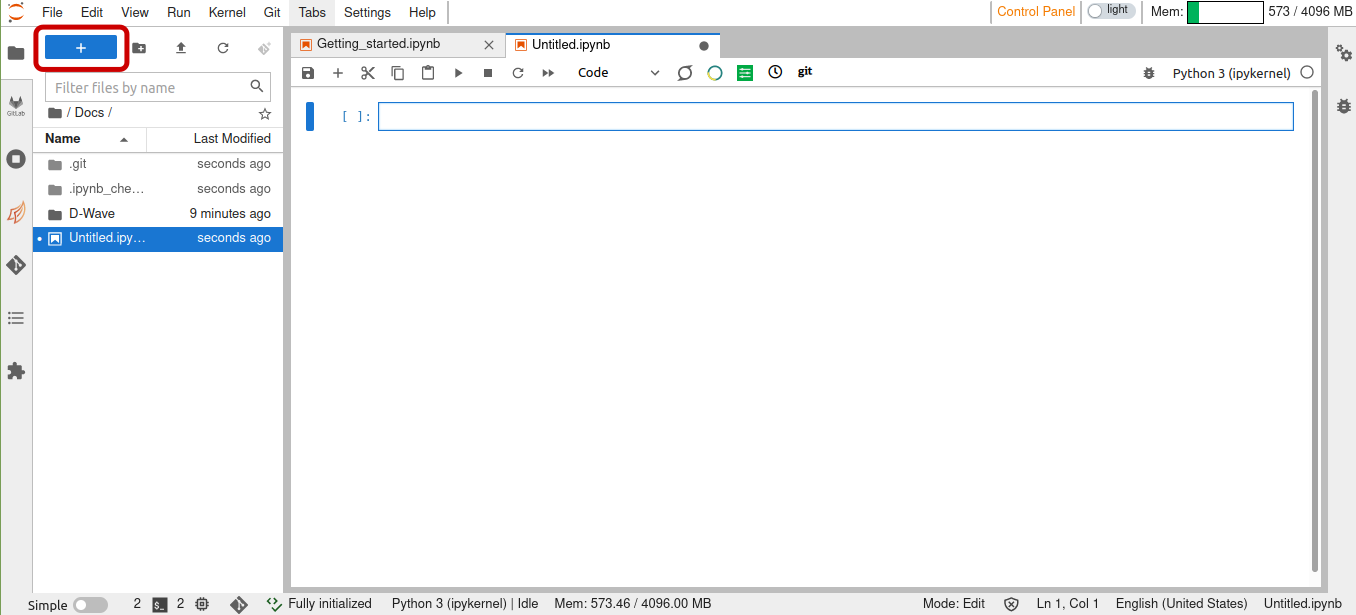

2. Open a terminal: at the bottom left of the launcher, click on the square button "Terminal" under the "Other" tab.
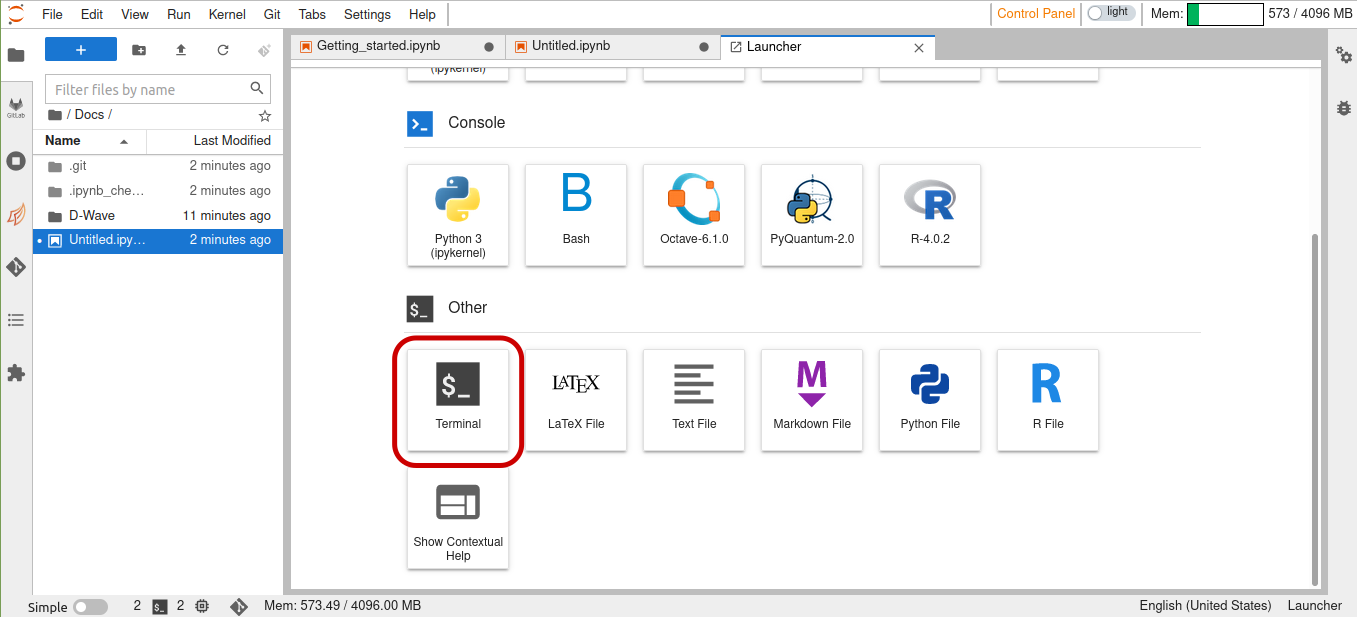


## Adding your preexisting configuration file to JUNIQ

This section shows how to make a preexisting D-Wave configuration file from another system available in JUNIQ.

<div class="alert alert-block alert-info">
<b>Note:</b>
If you do not already have a D-Wave configuration file please skip to the next section.
</div>


1. In the terminal type the following commands:

```
mkdir /home/jovyan/.config/dwave/
cd /home/jovyan/.config/dwave
cat > dwave.conf
```

2. Copy the contents of your configuration file and paste them using **Shift+Right click>Paste**, then hit **Ctrl+D**.

3. Jump to [this section](#checking) to check if your configuration works.

## Creating your configuration file (basic workflow)

This section shows how to create a minimal access configuration file which will work, but without getting into any of the fancy configuration options. 

<div class="alert alert-block alert-info">
<b>Note:</b>
If you would like more control over which devices you want to connect to (e.g. to target a specific device, or to create different profiles to access different devices) please read this section and then continue on to the next section.
</div>

1. In the terminal type `dwave config create`. This tool will guide you through steps required to complete the configuration. Just press **Enter** to pick the default value until you get prompted to input the `Authentication token`.

2. In this step you will need to retrieve your D-Wave token. To get it log into <a href="https://cloud.dwavesys.com/leap/">D-Wave Leap</a>, scroll down and on the left you will see a section titled "API Token". Click on the **Copy** button to add the token to your clipboard.

<div class="alert alert-block alert-warning">
<b>WARNING!:</b>
Please keep your token private since it could be used by anyone to access the systems on your behalf. If you suspect your token has been compromised (e.g. if you accidentally committed it to a public repository), then you should <b>immediately</b> regenerate it by logging into <a href="https://cloud.dwavesys.com/leap/">D-Wave Leap</a> and clicking the <b>Reset</b> button right below the <b>Copy</b> button. Then repeat the steps in this section using your fresh new token.
</div>


3. Back in the terminal, paste the token using **Shift+Right click>Paste**, then hit **Enter** to save the configuration.

4. If this setup is sufficient for your purposes then jump to [this section](#checking) to check if your configuration works.


## Creating your configuration file (advanced workflow)

For more sophisticated configurations you can learn about the available options [here](https://docs.ocean.dwavesys.com/en/stable/overview/sapi.html).

To specifically target the D-Wave quantum annealer hosted at Forschungszentrum Jülich you will need to provide the following inputs:
* `Solver API region`: eu-central-1,
* `Solver API endpoint URL`: https://eu-central-1.cloud.dwavesys.com/sapi/v2/,
* `Solver`: Advantage_system5.1,

For the D-Wave-hosted Advantage system:
* `Solver API region`: na-west-1,
* `Solver API endpoint URL`: https://na-west-1.cloud.dwavesys.com/sapi/v2/,
* `Solver`: Advantage_system4.1,

And for the D-Wave-hosted older DW-2000Q system:
* `Solver API region`: na-west-1,
* `Solver API endpoint URL`: https://na-west-1.cloud.dwavesys.com/sapi/v2/,
* `Solver`: DW_2000Q_6.

You can also create a profile for each system, so later you can conveniently address them in your code just by passing the profile alias of the system you want to reach. This is how a multi-profile configuration file for the FZJ's system (`eu`), D-Wave's new Advantage system (`na`) and D-Wave's old DW-2000Q system (`DW2000Q`) could look like (with the token removed):

```
[defaults]
token = {Your token goes here}

[eu]
region = eu-central-1
client = qpu
solver = Advantage_system5.1

[na]
region = na-west-1
client = qpu
solver = Advantage_system4.1

[DW2000Q]
region = na-west-1
client = qpu
solver = DW_2000Q_6
```

<div class="alert alert-block alert-info">
<b>Note:</b>
Whichever options are set under the `defaults` profile will be used by default if the currently active profile doesn't overwrite them. In this example the token is valid for accessing all systems, so it's added to the default section.
</div>

Once you are satisfied with your configuration file move on to the next section.

<a id='checking'></a>
## Checking that access has been correctly configured

Execute the following cell (**Select the cell below**, then hit **Shift+Enter**) to make sure that the connection to the quantum annealers is working:

In [13]:
! dwave ping

Error: Invalid configuration: API token not defined (code: 1)


If everything was configured correctly you should see something like:

```
Using endpoint: https://eu-central-1.cloud.dwavesys.com/sapi/v2/
Using solver: Advantage_system5.1
Submitted problem ID: 2ed0933c-1e81-4a1b-ab2d-eac62e230aa5

Wall clock time:
 * Solver definition fetch: 564.162 ms
 * Problem submit and results fetch: 447.822 ms
 * Total: 1011.984 ms

QPU timing:
 * post_processing_overhead_time = 162.0 us
 * qpu_access_overhead_time = 8035.1 us
 * qpu_access_time = 8659.9 us
 * qpu_anneal_time_per_sample = 20.0 us
 * qpu_delay_time_per_sample = 21.02 us
 * qpu_programming_time = 8495.4 us
 * qpu_readout_time_per_sample = 123.48 us
 * qpu_sampling_time = 164.5 us
 * total_post_processing_time = 162.0 us
```

You can also check the options available to you for a more fine-grained ping test by running the cell below, for instance if you configured several profiles and you want to make sure that they all work:

In [14]:
! dwave ping --help

Usage: dwave ping [OPTIONS]

  Ping the QPU by submitting a single-qubit problem.

Options:
  -p, --profile TEXT             Connection profile (section) name
  -c FILE                        [Deprecated in favor of '-f']
  -f, --config-file FILE         Configuration file path
  --region CODE                  Solver API region (default: from config)
  --endpoint URL                 Solver API endpoint (default: from config)
  -s, --solver TEXT              Feature-based solver filter (default: from
                                 config)

  --client [base|qpu|sw|hybrid]  Client type used (default: from config)
  -m, --sampling-params TEXT     Sampling parameters (JSON encoded)
  --request-timeout FLOAT        Connection and read timeouts (in seconds) for
                                 all API requests

  --polling-timeout FLOAT        Problem polling timeout in seconds (time-to-
                                 solution timeout)

  --json                         JSON output
  --hel

## Final steps

Now that you have access to D-Wave quantum annealers from JUNIQ, it's all set for you to start coding!

Import the D-Wave Ocean SDK in your Python code as follows:

In [15]:
import dwave

## Additional resources

Here are some useful links to get you started with D-Wave quantum annealers:

* <a href="https://cloud.dwavesys.com/leap/">D-Wave Leap</a>: At the top of the dashboard you will find demos and examples which are ideally suited for beginners.

* <a href="https://docs.dwavesys.com/docs/latest/index.html">D-Wave System Documentation</a>: Technical info on quantum annealing and D-Wave hardware. 

* <a href="https://docs.ocean.dwavesys.com/en/stable/">D-Wave Ocean SDK Documentation</a>: All you need to know about the software tools available through the D-Wave Ocean SDK.

* <a href="https://docs.dwavesys.com/docs/latest/doc_handbook.html">Problem-Solving Handbook</a>: Provides advanced guidance on using D-Wave solvers, in particular QPU solvers. It lists, explains, and demonstrates techniques of problem formulation, minor-embedding, and configuring QPU parameters to optimize performance.

* <a href="https://support.dwavesys.com/hc/en-us/community/topics">D-Wave community forum</a>: If you get stuck, get help from experts and other users here.